In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [2]:
data = pd.read_csv('data.csv');

##  Groupby 'from_area_id' to get all the trips originating from an area



In [3]:
k = data.groupby('from_area_id')

In [4]:
k.get_group(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
1635,134484,30991,12,NaN,2,2.0,393.0,NaN,NaN,1/21/2013 3:00,NaN,0,0,1/19/2013 15:27,12.99212,77.67218,13.199560,77.706880,0
3805,137160,17870,12,NaN,2,2.0,222.0,NaN,NaN,2/9/2013 7:45,NaN,0,0,2/9/2013 2:03,12.99212,77.67218,12.972160,77.593830,0
3878,137261,24697,12,NaN,2,2.0,1021.0,NaN,NaN,2/9/2013 20:00,NaN,0,0,2/9/2013 18:41,12.99212,77.67218,13.028530,77.546250,0
5985,139846,25975,87,2.0,3,2.0,NaN,NaN,NaN,3/3/2013 0:00,NaN,0,0,3/2/2013 19:24,12.99212,77.67218,NaN,NaN,0
7561,141772,17870,24,NaN,2,2.0,393.0,NaN,NaN,3/22/2013 7:00,NaN,0,0,3/22/2013 1:05,12.99212,77.67218,13.199560,77.706880,0
7776,142025,27010,12,NaN,2,2.0,455.0,NaN,NaN,3/24/2013 12:00,NaN,0,0,3/24/2013 10:25,12.99212,77.67218,12.999874,77.678120,1
8261,142590,27281,12,2.0,3,2.0,NaN,NaN,NaN,3/29/2013 11:00,NaN,0,0,3/29/2013 9:53,12.99212,77.67218,NaN,NaN,0
8303,142638,27314,12,1.0,3,2.0,NaN,NaN,NaN,3/29/2013 17:00,NaN,0,0,3/29/2013 16:26,12.99212,77.67218,NaN,NaN,0
8606,143016,27281,12,NaN,2,2.0,393.0,NaN,NaN,4/1/2013 8:00,NaN,0,0,3/31/2013 20:44,12.99212,77.67218,13.199560,77.706880,0
12160,147392,4954,12,NaN,2,2.0,393.0,NaN,NaN,5/4/2013 8:00,NaN,1,0,5/3/2013 17:15,12.99212,77.67218,13.199560,77.706880,0


In [5]:
gk = data.groupby('from_area_id').mean()

In [6]:
df = data[['from_area_id','Car_Cancellation']].groupby('from_area_id')

In [ ]:
df.get_group(2)

In [7]:
area_wise_dict = {}
for i in list(df.groups.keys()):
    area_wise_dict[i] = df.get_group(i);

In [8]:
(area_wise_dict[2]['Car_Cancellation'] == 1).sum()

4

## Calculating probability of getting a cab and plotting area id vs prob of getting a cab
.

In [9]:
no_of_cancellations = {}
total_trips = {}
prob_of_getting_a_cab = {}
for i in list(area_wise_dict.keys()):
    no_of_cancellations[i] = (area_wise_dict[i]['Car_Cancellation'] == 1).sum();
    total_trips[i] = area_wise_dict[i].shape[0];
    prob_of_getting_a_cab[i] = round((1 - no_of_cancellations[i]/total_trips[i]),2); 

In [10]:
prob_of_getting_a_cab.items()

dict_items([(2.0, 0.87), (6.0, 1.0), (15.0, 1.0), (16.0, 1.0), (17.0, 1.0), (22.0, 0.8), (24.0, 0.96), (25.0, 0.97), (34.0, 0.67), (49.0, 0.75), (50.0, 1.0), (51.0, 1.0), (52.0, 0.93), (58.0, 0.92), (61.0, 0.86), (62.0, 0.84), (67.0, 0.78), (68.0, 1.0), (72.0, 1.0), (79.0, 1.0), (83.0, 0.91), (85.0, 0.9), (87.0, 0.93), (89.0, 0.97), (91.0, 0.85), (92.0, 0.92), (95.0, 1.0), (97.0, 0.94), (104.0, 1.0), (105.0, 0.96), (112.0, 0.95), (115.0, 0.99), (117.0, 0.87), (118.0, 1.0), (119.0, 0.93), (120.0, 0.89), (122.0, 0.81), (128.0, 0.95), (130.0, 0.2), (133.0, 1.0), (136.0, 0.9), (137.0, 0.89), (138.0, 0.0), (141.0, 0.93), (142.0, 0.94), (143.0, 1.0), (145.0, 0.95), (147.0, 0.93), (149.0, 0.94), (150.0, 0.91), (151.0, 0.93), (156.0, 0.86), (157.0, 0.91), (160.0, 0.82), (167.0, 0.95), (168.0, 0.97), (171.0, 0.87), (172.0, 0.9), (173.0, 1.0), (174.0, 1.0), (176.0, 0.47), (177.0, 0.67), (178.0, 1.0), (181.0, 1.0), (182.0, 0.94), (184.0, 0.91), (185.0, 1.0), (186.0, 0.73), (187.0, 0.99), (190.0, 

In [11]:
X = list(prob_of_getting_a_cab.keys())
y = list(prob_of_getting_a_cab.values())

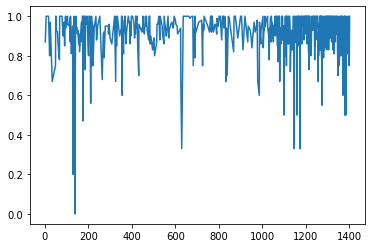

In [12]:
plt.plot(X,y)

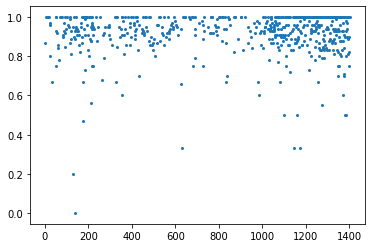

In [13]:
plt.scatter(X,y,s=4)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(9), int64(7), object

In [15]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


## Feature Engineering and Data Preprocessing


In [16]:
data['package_id'].nunique() 

7

In [17]:
data.drop(['package_id'],axis=1,inplace=True) # 84% data in this column is missing. Hence dropped

In [18]:
mode = data['to_area_id'].mode()

In [19]:
data['to_area_id'] = data['to_area_id'].fillna(mode[0])

In [20]:
data['to_area_id'].isnull().any()

False

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             43431 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(8), int64(7), object(3)
memory usage: 6.0+ MB


In [22]:
mode = data['from_lat'].mode()
data['from_lat'] = data['from_lat'].fillna(mode[0])

In [23]:
mode = data['from_long'].mode()
data['from_long'] = data['from_long'].fillna(mode[0])

In [24]:
mode = data['from_area_id'].mode()
data['from_area_id'] = data['from_area_id'].fillna(mode[0])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43431 non-null float64
to_area_id             43431 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43431 non-null float64
from_long              43431 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(8), int64(7), object(3)
memory usage: 6.0+ MB


In [26]:
mode = data['from_area_id'].mode()
data['from_area_id'] =  data['from_area_id'].fillna(mode)

In [32]:
mode = data['to_lat'].mode()
data['to_lat'] =  data['to_lat'].fillna(mode[0])

In [31]:
mode = data['to_long'].mode()
data['to_long'] =  data['to_long'].fillna(mode[0])


In [33]:
temp = data # Creating temp to continue further preprocessing. Keeping data intact to return to if further preprocessing doesn't work.

In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43431 non-null float64
to_area_id             43431 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43431 non-null float64
from_long              43431 non-null float64
to_lat                 43431 non-null float64
to_long                43431 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(8), int64(7), object(3)
memory usage: 6.0+ MB


In [35]:
temp.drop(['from_city_id','to_city_id','from_date','to_date'],axis=1,inplace=True)

In [36]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 14 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43431 non-null float64
to_area_id             43431 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43431 non-null float64
from_long              43431 non-null float64
to_lat                 43431 non-null float64
to_long                43431 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 4.6+ MB


In [37]:
def getday(x):
    while x > 7:
        x=x-7;
    return x; 

def get_slab(hour):
    if(hour<=7):
        return 1
    elif (hour>7 and hour<16):
        return 2
    else:
        return 3

In [39]:
# Getting data from booking date

isWeekend = [];
day_of_the_week = []
hour_slab = []
for i in data['booking_created']:
    date,time = i.split(' ');
    x = int(date.split('/')[0]);
    day = x if (x<=7) else getday(x); 
    weekend = 1 if (day>5 and day<8) else 0;
    isWeekend.append(weekend)
    day_of_the_week.append(day)
    hour_of_day = int(time.split(':')[0]);
    hour_slab.append(get_slab(hour_of_day));
#     print(time)
#     print(get_slab(hour_of_day))
    

In [40]:
temp['isWeekend'] = isWeekend;
temp['Day_of_week'] = day_of_the_week;
temp['time_slab'] = hour_slab

In [41]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43431 non-null float64
to_area_id             43431 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43431 non-null float64
from_long              43431 non-null float64
to_lat                 43431 non-null float64
to_long                43431 non-null float64
Car_Cancellation       43431 non-null int64
isWeekend              43431 non-null int64
Day_of_week            43431 non-null int64
time_slab              43431 non-null int64
dtypes: float64(6), int64(10), object(1)
memory usage: 5.6+ MB


In [42]:
temp.isWeekend.unique()
temp.Day_of_week.unique()
temp.time_slab.unique()

array([1, 2, 3])

In [43]:
temp.drop(['booking_created'],axis=1,inplace=True)

In [44]:
X = temp.drop(['Car_Cancellation'],axis=1)
y = temp['Car_Cancellation']

In [45]:
for i in temp.columns:
    print(temp[i].isna().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


## Training the model.

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [47]:
clg = LogisticRegression()
clg.fit(X_train,y_train)
clfPred = clg.predict(X_test)

/home/mendax/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
accuracy_score(clfPred,y_test)

0.9233307751343055

In [49]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [50]:
accuracy_score(y_pred,y_test)

0.9270145817344589

## Putting predictions into dataframe for calculating probabili 

In [52]:
predicted = X_test;
predicted['Car_Cancellation'] = y_pred

/home/mendax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
predicted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 15558 to 19508
Data columns (total 16 columns):
id                     13030 non-null int64
user_id                13030 non-null int64
vehicle_model_id       13030 non-null int64
travel_type_id         13030 non-null int64
from_area_id           13030 non-null float64
to_area_id             13030 non-null float64
online_booking         13030 non-null int64
mobile_site_booking    13030 non-null int64
from_lat               13030 non-null float64
from_long              13030 non-null float64
to_lat                 13030 non-null float64
to_long                13030 non-null float64
isWeekend              13030 non-null int64
Day_of_week            13030 non-null int64
time_slab              13030 non-null int64
Car_Cancellation       13030 non-null int64
dtypes: float64(6), int64(10)
memory usage: 1.7 MB


In [54]:
predicted['Car_Cancellation'].unique()

array([0, 1])

In [55]:
area_group = predicted.groupby(['from_area_id']);

In [56]:
area_group.groups.keys()

dict_keys([2.0, 6.0, 15.0, 22.0, 24.0, 25.0, 34.0, 49.0, 50.0, 51.0, 52.0, 58.0, 61.0, 62.0, 67.0, 68.0, 83.0, 85.0, 87.0, 89.0, 91.0, 92.0, 95.0, 97.0, 104.0, 105.0, 112.0, 115.0, 117.0, 119.0, 120.0, 122.0, 128.0, 130.0, 136.0, 137.0, 141.0, 142.0, 143.0, 145.0, 147.0, 149.0, 150.0, 151.0, 156.0, 157.0, 160.0, 167.0, 168.0, 171.0, 172.0, 173.0, 176.0, 177.0, 178.0, 182.0, 184.0, 186.0, 187.0, 190.0, 192.0, 195.0, 197.0, 200.0, 201.0, 203.0, 206.0, 207.0, 209.0, 211.0, 212.0, 213.0, 214.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 227.0, 238.0, 243.0, 253.0, 264.0, 269.0, 271.0, 273.0, 278.0, 292.0, 293.0, 296.0, 297.0, 300.0, 308.0, 321.0, 328.0, 330.0, 334.0, 339.0, 344.0, 352.0, 353.0, 355.0, 356.0, 357.0, 358.0, 362.0, 363.0, 367.0, 373.0, 376.0, 391.0, 392.0, 393.0, 396.0, 398.0, 404.0, 409.0, 410.0, 413.0, 414.0, 417.0, 418.0, 419.0, 420.0, 422.0, 424.0, 428.0, 432.0, 433.0, 447.0, 448.0, 450.0, 451.0, 452.0, 455.0, 458.0, 463.0, 466.0, 467.0, 471.0, 478.0, 479.0, 484.0, 488.0, 

In [57]:
area_wise_dict = {}
for i in list(area_group.groups.keys()):
    area_wise_dict[i] = area_group.get_group(i);

In [58]:
no_of_cancellations = {}
total_trips = {}
prob_of_getting_a_cab = {}
for i in list(area_wise_dict.keys()):
    no_of_cancellations[i] = (area_wise_dict[i]['Car_Cancellation'] == 1).sum();
    total_trips[i] = area_wise_dict[i].shape[0];
    prob_of_getting_a_cab[i] = round((1 - no_of_cancellations[i]/total_trips[i]),2); 

In [59]:
X = list(prob_of_getting_a_cab.keys())
y = list(prob_of_getting_a_cab.values())

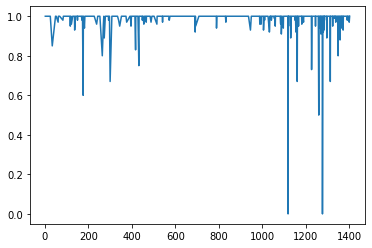

In [60]:
plt.plot(X,y)

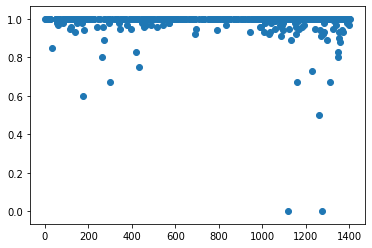

In [61]:
plt.scatter(X,y)

In [62]:
def price_surge(probab):
    base_price = 100;
    multiplier = 1.5;
    if probab >= .75:
        return base_price;
    elif probab >= .25 and probab < .75:
        return base_price * multiplier;
    else:
        return base_price * 2 * multiplier;

In [63]:
price = {}
for i in prob_of_getting_a_cab.keys():
#     print(prob_of_getting_a_cab[i]);
#     print(price_surge(prob_of_getting_a_cab[i]));
    price[i] = price_surge(prob_of_getting_a_cab[i]);

In [64]:
Final = pd.DataFrame()

In [65]:
Final['area_id'] = list(price.keys())
Final['price'] = price.values()

In [66]:
Final.price.unique()

array([100., 150., 300.])

In [68]:
Final

,area_id,price
0,2.0,100.0
1,6.0,100.0
2,15.0,100.0
3,22.0,100.0
4,24.0,100.0
5,25.0,100.0
6,34.0,100.0
7,49.0,100.0
8,50.0,100.0
9,51.0,100.0
